In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Load the data into a Pandas dataframe
df = pd.read_csv('EV_Data_new.csv')



In [3]:
# Print the header
df.head()

,Name,Total Electric Vehicle,Total Non-Electric Vehicle,No. of Charging Stations,Total
0,Andaman & Nicobar Island,162,"1,46,945",10,"1,47,107"
1,Arunachal Pradesh,20,"2,52,965",266,"2,52,985"
2,Assam,"64,766","46,77,053",20,"47,41,819"
3,Bihar,"83,335","1,04,07,078",37,"1,04,90,413"
4,Chandigarh,"2,812","7,46,881",118,"7,49,693"


In [4]:
# Check the shape of the data
print("Data shape:", df.shape)

Data shape: (33, 5)


In [5]:
# Check the data types and missing values
print("Data info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name                        33 non-null     object
 1   Total Electric Vehicle      33 non-null     object
 2   Total Non-Electric Vehicle  32 non-null     object
 3   No. of Charging Stations    33 non-null     int64 
 4   Total                       32 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.4+ KB
Data info:
 None


In [6]:

# Check the descriptive statistics of the data
print("Data summary statistics:\n", df.describe())

Data summary statistics:
        No. of Charging Stations
count                 33.000000
mean                  91.545455
std                  107.112117
min                    0.000000
25%                   10.000000
50%                   29.000000
75%                  194.000000
max                  317.000000


In [28]:
# Check the number of missing values in each column
df.isnull().sum()

Name                          0
Total Electric Vehicle        0
Total Non-Electric Vehicle    1
No. of Charging Stations      0
Total                         1
dtype: int64

In [29]:
# Drop the row containing the missing value
df = df.dropna()

In [30]:
# Check the number of missing values again
df.isnull().sum()

Name                          0
Total Electric Vehicle        0
Total Non-Electric Vehicle    0
No. of Charging Stations      0
Total                         0
dtype: int64

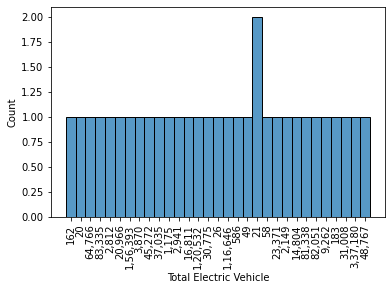

In [33]:
import seaborn as sns
# Histogram of Total Electric Vehicle
sns.histplot(data=df, x="Total Electric Vehicle")
plt.subplots_adjust(bottom=0.15) # adjust the bottom margin
plt.xticks(rotation=90)
plt.show()

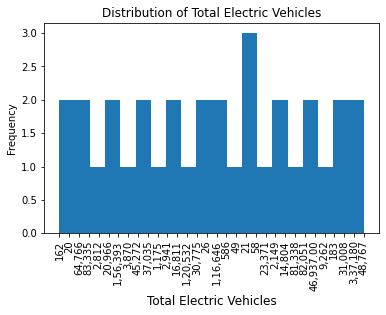

In [16]:

# Plot a histogram of the total electric vehicles column

plt.hist(df['Total Electric Vehicle'], bins=20)
plt.title("Distribution of Total Electric Vehicles")
plt.xlabel("Total Electric Vehicles")
plt.ylabel("Frequency")
plt.subplots_adjust(bottom=0.15) # adjust the bottom margin
plt.xticks(rotation=90)
plt.xlabel("Total Electric Vehicles", fontsize=12)
plt.show()

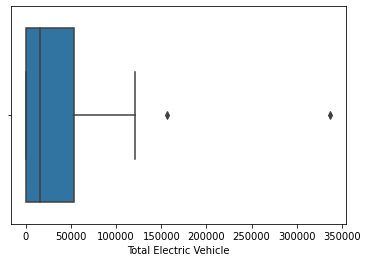

In [39]:
df['Total Electric Vehicle'] = pd.to_numeric(df['Total Electric Vehicle'].str.replace(',', ''))
sns.boxplot(data=df, x="Total Electric Vehicle")
plt.show()


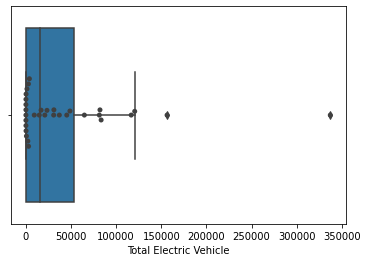

In [40]:
sns.boxplot(data=df, x="Total Electric Vehicle")
sns.swarmplot(data=df, x="Total Electric Vehicle", color=".25")
plt.show()

### ADDITIONAL VISUALISATION  

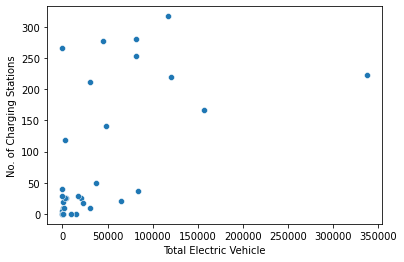

In [41]:
##Scatterplot of "Total Electric Vehicle" and "No. of Charging Stations":

sns.scatterplot(data=df, x="Total Electric Vehicle", y="No. of Charging Stations")
plt.show()


OBSERVATION: This will show you the relationship between the number of electric vehicles 
    and the number of charging stations available in each state/UT.

In [44]:
df.columns

Index(['Name      ', 'Total Electric Vehicle', 'Total Non-Electric Vehicle',
       'No. of Charging Stations', 'Total'],
      dtype='object')

In [46]:
df.columns = df.columns.str.strip()

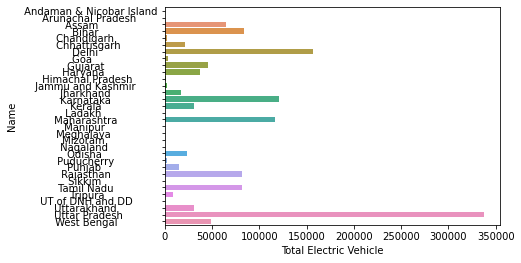

In [48]:
##Bar chart of "Total Electric Vehicle" by state/UT: 
sns.barplot(data=df, x="Total Electric Vehicle", y="Name")
plt.show()


OBSERVATION :This will show you how the number of electric vehicles varies across different states/UTs in India.

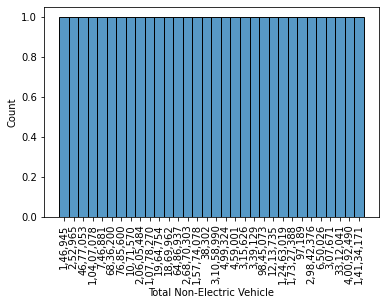

In [50]:
## Histogram of "Total Non-Electric Vehicle":

sns.histplot(data=df, x="Total Non-Electric Vehicle")
plt.subplots_adjust(bottom=0.15) # adjust the bottom margin
plt.xticks(rotation=90)
plt.show()


This will show you the distribution of non-electric vehicles across all states/UTs.

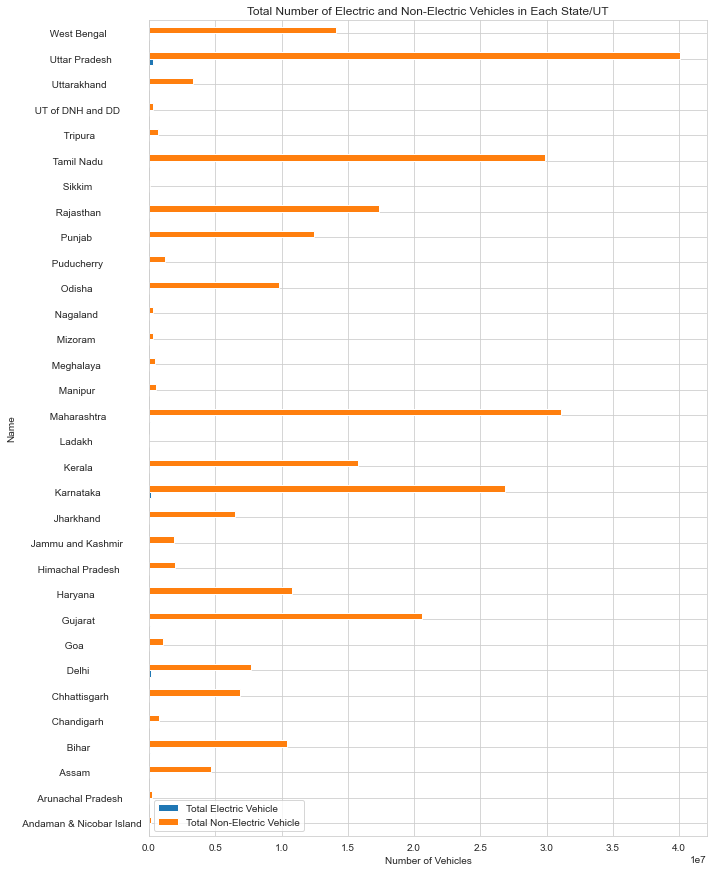

In [57]:
##Bar chart showing the total number of electric and non-electric vehicles in each state/UT: 
# convert columns to numeric types
df['Total Non-Electric Vehicle'] = pd.to_numeric(df['Total Non-Electric Vehicle'].str.replace(',', ''), errors='coerce')

# convert 'Total Electric Vehicle' column to numeric
df['Total Electric Vehicle'] = pd.to_numeric(df['Total Electric Vehicle'])

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,15))
df.plot(kind='barh', x='Name', y=['Total Electric Vehicle', 'Total Non-Electric Vehicle'], ax=ax)
ax.set_xlabel('Number of Vehicles')
ax.set_ylabel('Name')
plt.title('Total Number of Electric and Non-Electric Vehicles in Each State/UT')
plt.show()

In [60]:
# add labels and legend
ax.set_xlabel("Number of Vehicles")
ax.set_ylabel("Name")
ax.set_title("Total Number of Electric and Non-Electric Vehicles by State/UT")
ax.legend()

plt.show()

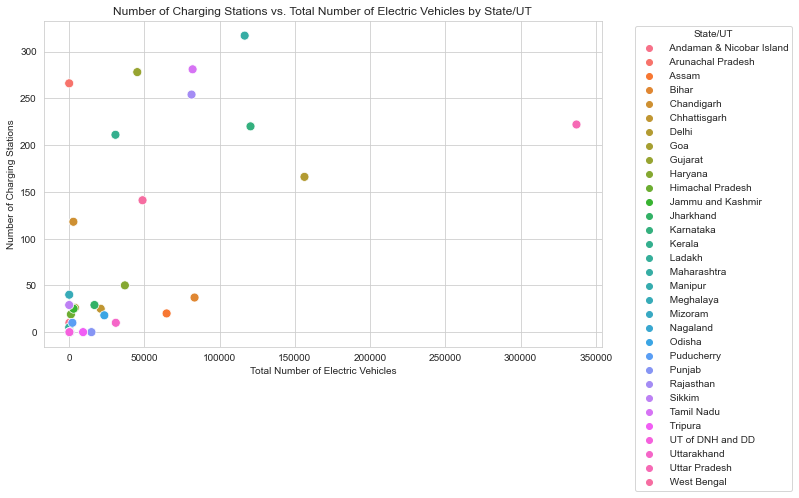

In [63]:
##Scatter plot showing the relationship between the number of electric vehicles and the number of charging stations in each state/UT:




sns.set_style("whitegrid")

# create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Total Electric Vehicle", y="No. of Charging Stations", hue="Name", s=80)

# add labels and legend
plt.xlabel("Total Number of Electric Vehicles")
plt.ylabel("Number of Charging Stations")
plt.title("Number of Charging Stations vs. Total Number of Electric Vehicles by State/UT")
plt.legend(title="State/UT", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

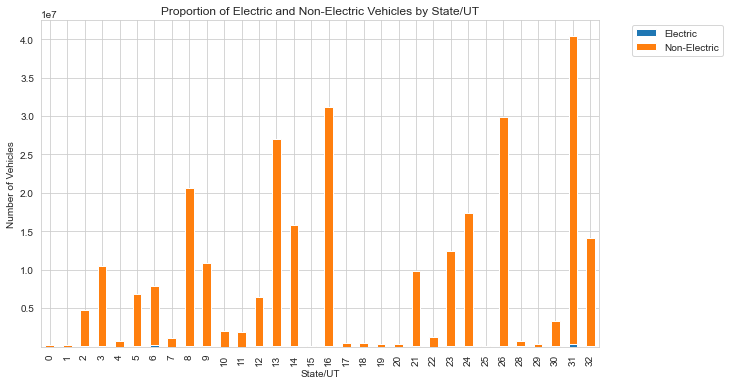

In [64]:
##Stacked bar chart showing the proportion of electric and non-electric vehicles in each state/UT:

sns.set_style("whitegrid")

# create a stacked bar chart
df[['Total Electric Vehicle', 'Total Non-Electric Vehicle']].plot(kind='bar', stacked=True, figsize=(10,6))

# add labels and legend
plt.xlabel("State/UT")
plt.ylabel("Number of Vehicles")
plt.title("Proportion of Electric and Non-Electric Vehicles by State/UT")
plt.legend(["Electric", "Non-Electric"], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()